# **`M.3.Unsupervised`** - Iris dataset

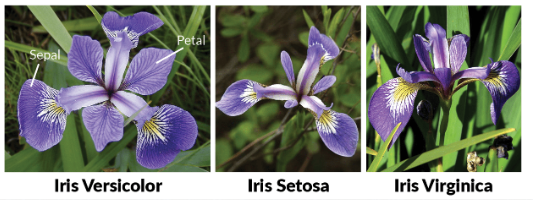

##`Overview - Iris Assignmment`

`Objectives`
Use the provided data analysis stages to perform exploratory activities
on the Fisher Iris dataset leading to quality predictive outcomes.

`how.To`
1. Organize and present your analysis.
- Understand that analysis is iterative, and stages may overlap.
- Consolidate your methodology, providing a clear and precise story.
- There is no need to provide presentations or documents.
2. Craft and modify code to solve questions.
3. Use all algorithms listed below.
4. Use resources and apply methods to solve challenges.
5. Submit work with the correct file name.
`note:` Typically, "scaling" is included in machine learning. Due to algorithm
quantity, it was separated as stage.3 to help organize analysis work.

`Tasks`
> Stage 1: Data Preparation
>> Stage 2: Feature Extraction
>>> Stage 3: Data Scaling
>>>> Stage 4: Machine Learning and Evaluation
>>>>> Stage 5: Visualization

`Background, data, and methods`
- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://www.kaggle.com/datasets/uciml/iris?resource=download
- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

`Algorithms`
1.	K-Means Clustering
2.	Hierarchical Clustering
3.	Density-Based Spatial Clustering of Applications w Noise
4.	Isolation Forest
5.	Local Outlier Factor
6.	Principal Component Analysis
7.	Singular Value Decomposition
8.	T-Distributed Stochastic Neighbor Embedding With Autoencoder
9.	Singular Value Decomposition


## `Task.Warmup`
`Warm.up.1` - locate and read the source paper
- Fisher, R.A. (1936). classic 1936 paper, The Use of Multiple Measurements in
 Taxonomic Problems. Annuals of Eugenics, Vol.7, Iss.2.
`Warm.up.2` - detail 1 interesting fact or learning from the 11 page paper
`Warm.up.3` - Referring to Fig.1 Frequency Histogram what, algorithm
=> "should"help indicate or determine if Iris setosa has an outlier?
=> provide a rapid or gut response based on your canvas learnings.

#Answer solution

`Warm.up.1` - locate and read the source paper


`Warm.up.2` - detail 1 interesting fact or learning from the 11 page paper


## `Stage.1.Data.Prepartion`

**`Tasks`**
1. Stage.1.Task.1 - What data is concerning?
2. Stage.1.Task.2 - Are transformations needed?
3. Stage.1.Task.3 - Write 2-5 points explaining learnings to another.

**`Useful links`**
- https://pandas.pydata.org/docs/reference/
- https://scikit-learn.org/stable/modules/preprocessing.html
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

**`Hints`**
- `Iris` is `notoriously tricky` for outlier visualization.
=> `Try` principal components analysis, reducing features to 2 dimensions


#### `Stage.1.Task` => ALL

In [1]:
#=>Enter Answer

#=> Stage.1.Task.1 - What data is concerning?
# No missing values or duplicate entries
# a few values in SepalWidthCm and PetalWidthCm look unusually low 
# (e.g., SepalWidthCm min = 2.0, PetalWidthCm min = 0.1)
# which could indicate potential outliers

#=> Stage.1.Task.2 - Are transformations needed?
# Yes, since the variables are measured on different scales and the presence of outliers is possible, 
# standardization or normalization should be applied before further analysis like PCA or clustering (foreshadowing). 
# This ensures that features contribute equally to the results and outliers do not disproportionately 
# affect the analysis.

#=> Stage.1.Task.3 - Write 2-5 sentences explaining as if you were explaining the data to a colleague.
#(this is mostly about data quality and origin).
# The Iris dataset is a well-known, clean dataset collected by R.A. Fisher, containing 150 samples of iris flowers with four numerical features: sepal length, sepal width, petal length, and petal width. 
# Each sample is labeled as one of three species: Setosa, Versicolor, or Virginica. 
# The dataset is free from missing values and duplicates, making it ideal for testing machine learning algorithms. 
# However, some feature values show potential outliers, especially for petal and sepal widths, which may need further inspection or transformation.



In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()

df = pd.DataFrame(iris.data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
df.insert(0, 'Id', range(1, len(df) + 1))
df['species_label'] = iris.target

species_map = {i: s for i, s in enumerate(iris.target_names)}
df['Species'] = df['species_label'].map(lambda x: "Iris-" + species_map[x].capitalize())

print(df.info())
print("output=> Dataframe information None\n")

print("species lable names\n", df['Species'].unique())
print()

# Check missing values
print("output=> Missing Values")
print(df.isnull().sum())
print()

# Dupe entries
print("output=> Duplicate Entries\n ", df.duplicated().sum())
print()

# Descriptive statistics
print("Use descriptive statstics to cursory assess outliers\n")
print(df[['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','species_label']].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   species_label  150 non-null    int64  
 6   Species        150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB
None
output=> Dataframe information None

species lable names
 ['Iris-Setosa' 'Iris-Versicolor' 'Iris-Virginica']

output=> Missing Values
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
species_label    0
Species          0
dtype: int64

output=> Duplicate Entries
  0

Use descriptive statstics to cursory assess outliers

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  Pet

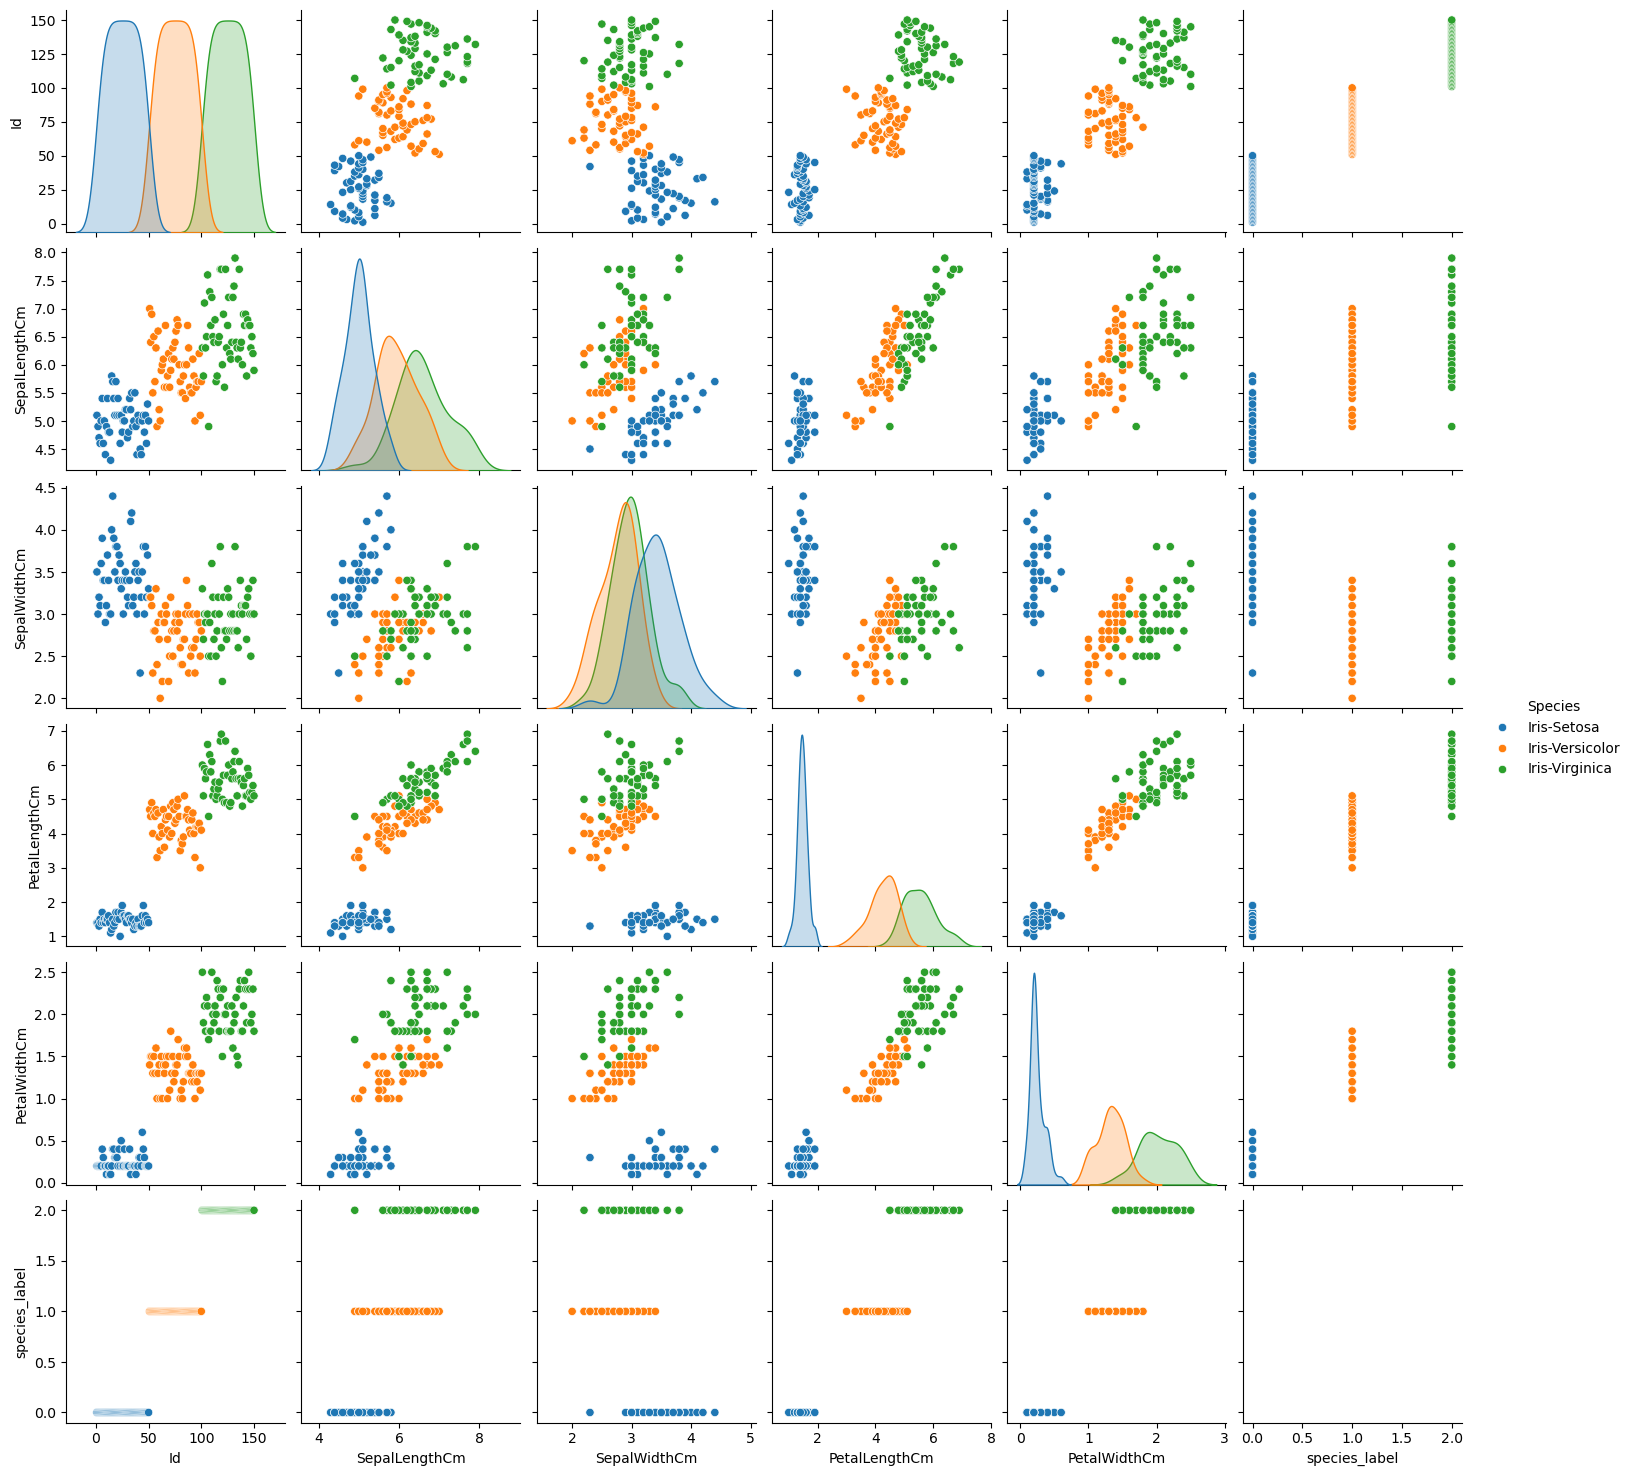

In [3]:
_ = sns.pairplot(df, hue="Species")

plt.show()

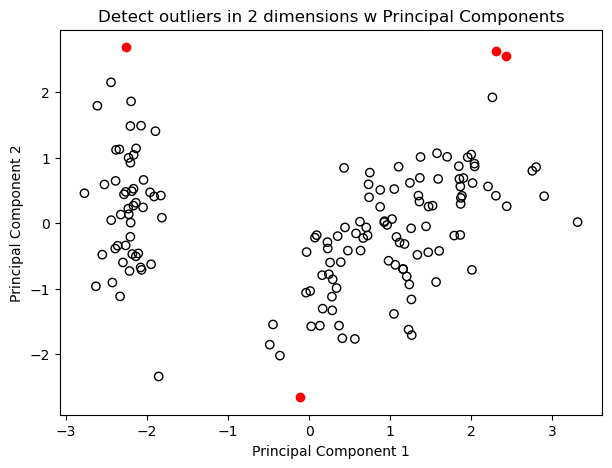

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])


X = StandardScaler().fit_transform(df)

# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Outlier detection using z-score in the PCA space
z = np.abs((X_pca - X_pca.mean(axis=0)) / X_pca.std(axis=0))
# Assumption for outliers: |z| > 2.5 (when z > 3, then no outliers)
outlier_mask = (z > 2.5).any(axis=1)

# Plotting
plt.figure(figsize=(7, 5))
plt.title("Detect outliers in 2 dimensions w Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plot inliers
plt.scatter(X_pca[~outlier_mask, 0], X_pca[~outlier_mask, 1], facecolors='none', edgecolors='black')

# Plot outliers
plt.scatter(X_pca[outlier_mask, 0], X_pca[outlier_mask, 1], color='red')
plt.show()

### `Stage.1` - Expected Outcomes

#### stage.1.expected outcomes
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             150 non-null    int64
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
output=> Dataframe information None

species lable names
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

output=> DataFrame header wo Species
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  species_label
0   1            5.1           3.5            1.4           0.2              0
1   2            4.9           3.0            1.4           0.2              0

output=> Missing Values
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
species_label    0
dtype: int64

output=> Duplicate Entries
  0

Use descriptive statstics to cursory assess outliers

Id	SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm	species_label
count	  150.0	 150.0	150.0	150.0	150.0	150.0
mean	  75.5	 5.8	 3.1	 3.8	 1.2	 1.0
std	    43.4	 0.8	 0.4	 1.8	 0.8	 0.8
min	    1.0	   4.3	 2.0	 1.0	 0.1	 0.0
25%	    38.2	 5.1	 2.8	 1.6	 0.3	 0.0
50%	    75.5	 5.8	 3.0	 4.4	 1.3	 1.0
75%	   112.8	 6.4	 3.3	 5.1	 1.8	 2.0
max	   150.0	 7.9	 4.4	 6.9	 2.5	 2.0
```
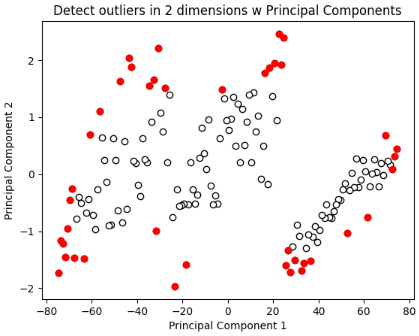
---------------------------------------
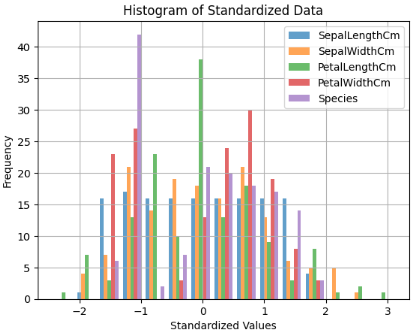


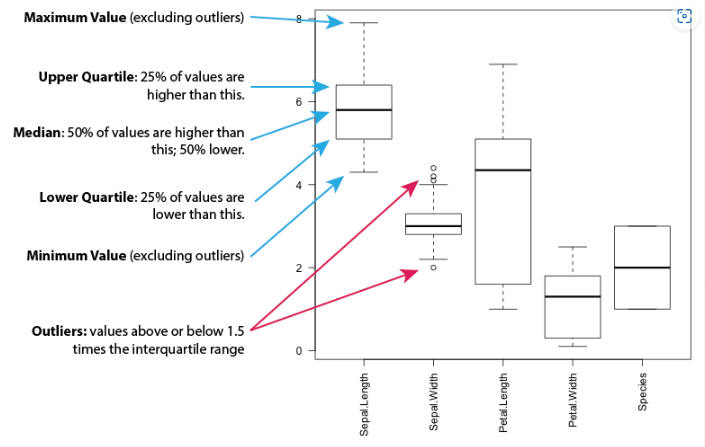
Boxplot figure quartile interpreation from: [rafael santos, 07.19.2019](http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html#:~:text=The%20Iris%20Dataset%20contains%20four,model%20to%20classify%20the%20species.)

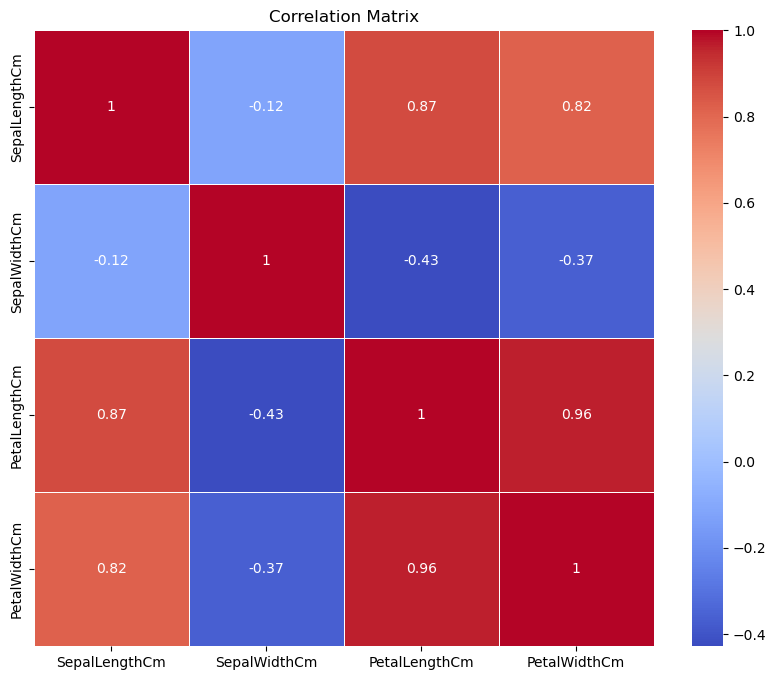

NameError: name 'y_train' is not defined

In [5]:
#=> Bonus items <potentially useful>
''' What does the inverse correlation mean for this dataset?
#=> your answer '''


#--------------------------> b.o.n.u.s.<-----------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr(numeric_only=True) #correlation
plt.figure(figsize=(10, 8))  #heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

from sklearn.metrics import accuracy_score

# accuracy for train set
accuracy_train = accuracy_score(y_train, kmeans_train_clusters)

# accuracy for test set
accuracy_test = accuracy_score(y_test, kmeans_test_clusters)

print("\n Train Set Accuracy:", accuracy_train)
print("\n Test Set Accuracy:", accuracy_test,"\n")


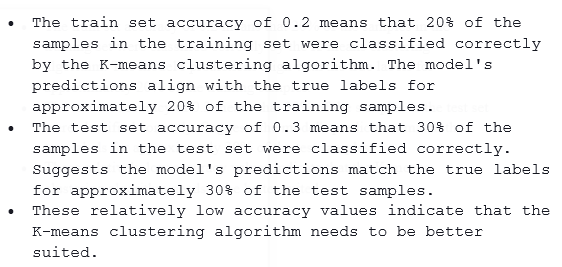

## `Stage.2.Feature.Extraction`

**`Tasks`**
1. Stage.2.Task.1 - List the four Iris dataset features available.
2. Stage.2.Task.2 - Read the provided abstract on feature extraction.
3. Stage.2.Task.3 - Reflect on your current strategy for storing skilling
 information and generate ideas in discourse what you can do going forward.
3. Stage.2.Task.4 - Write 2-4 bullets
- Discuss the mechanics of recalling feature extraction methods for future use.
- Share your current approach to storing skilling info future plans.
`Note: There is no coding in stage.2.`

`Learning moment`
- Data s
cience requires building and maintaining your toolbox on a daily basis.
- Take ownership of your work as no one else will do it for you.
- When your manager requests something by 8AM, they expect results by noon, not 5PM.
- Reflect on your current strategy and use class discourse to share insights with your peers.
`Professor Brain Full` uses Google Sheets size 14 rows, ~300 columns.

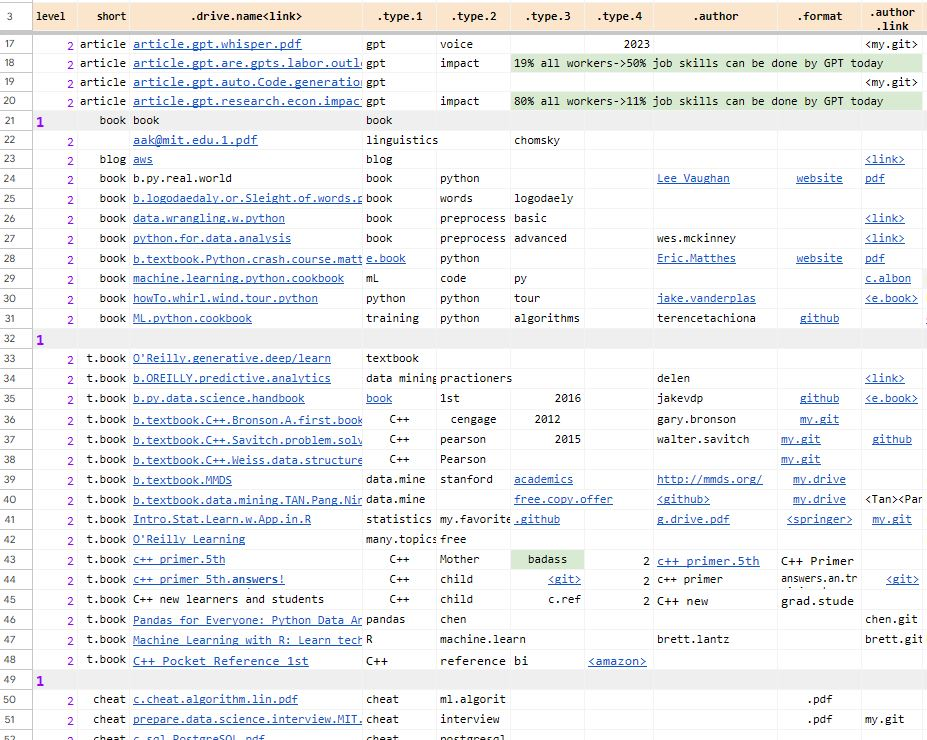

#### `Stage.2.Task => ALL`

In [22]:
#=>Enter Answer
'''=> Stage.2.Task.1 - List the four Iris dataset features available. <='''
'''
Sepal Length
Sepal Width
Petal Length
Petal Width
all in (cm)
'''
'''=> Stage.2.Task.2 - Read the provided abstract on feature extraction. <='''
'''=> Stage.2.Task.3 - Reflect on your current strategy for storing skilling
 information and generate ideas in discourse what you can do going forward. <='''
'''
Honestly, I have been very inconsistent with my data science learning and experience, I do have an academic background but no practical experience
Something that I lack is a consistent strategy for storing learned skills, currently I mostly would have a ton of 'notes' and stickypads for each project as needed 
I think a local excel sheet (uploaded to even google drive) similar to the one screenshot above would be very effective for my longevity and consistency (consistently storing skilling and consistently practicing my skills)
I am spending a decent amount of time looking up qualities that I have used before successfully (which would be circumvented by a personalized repository)
'''
'''
=> Stage.2.Task.4 - Write 2-4 bullets
- Discuss the mechanics of recalling feature extraction methods for future use.
- Share your current approach to storing skilling info (about how you do things in data analysis) future plans.   <=
'''
'''
- PCA and LDA are helpful feature extraction methods that reduce the number of variables while keeping important information.
- To remember when to use them, think: use PCA for simplifying data and LDA for separating classes.
- Techniques useful for large, complex datasets
- 
'''


'\n- PCA and LDA are helpful feature extraction methods that reduce the number of variables while keeping important information.\n- To remember when to use them, think: use PCA for simplifying data and LDA for separating classes.\n- Techniques useful for large, complex datasets\n- \n'

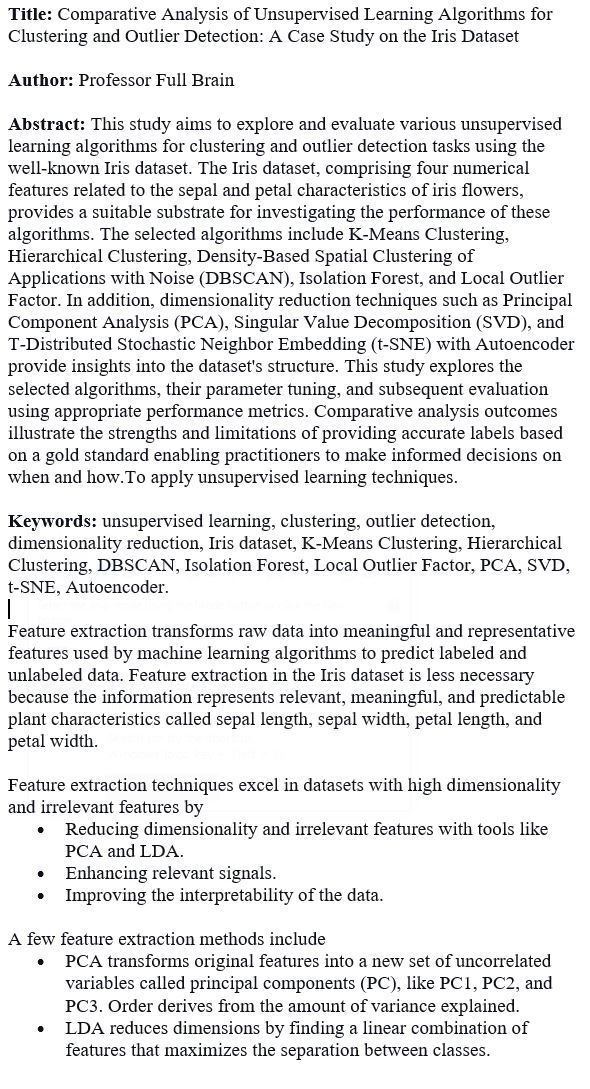

## `Stage.3.Data Scaling`

`Stage.3.Task`

A. Perform scaling and visualize outcomes.
B. Notate and curious issues or discriminating factors.

1.	K-Means Clustering
2.	Hierarchical Clustering
3.	Density-Based Spatial Clustering of Applications w Noise
4.	Isolation Forest
5.	Local Outlier Factor
6.	Principal Component Analysis
7.	Singular Value Decomposition
8.	T-Distributed Stochastic Neighbor Embedding With Autoencoder
9.	Singular Value Decomposition

#### `Stage.3.Task => ALL`

In [1]:
#Pick two from the below and apply them to your data.

#=> Enter Answer
#=> 1.K-Means Clustering
#=> 6.Principal Component Analysis

# Notes: Having difficulty with this task due to kernel crashing while idle & executing, starting from scratch
# Restarted computer, updated mac OS, made new environment for iris, runs some code fine but not certain parts, package problem/compatibility,
# Determined needed a new update for Arm3, discovered due to Kmeans sklearn incompatibility issue causing kernel to close
# Solved

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load iris and standardize
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
y = iris.target


In [13]:
# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

##### There is an issue with interdependency of packages specifically Kmeans in my current environment 

In [14]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

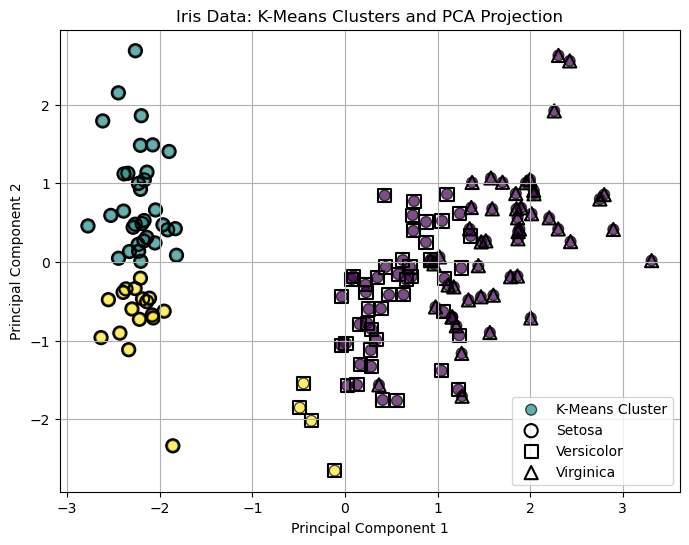

In [15]:
# Combined plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis', s=60, alpha=0.7, edgecolor='k', label='K-Means Cluster')

# Some marker shapes 
markers = ['o', 's', '^']
for i, species in enumerate(iris.target_names):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1],
                marker=markers[i], edgecolor='k', facecolor='none', s=90, linewidth=1.5,
                label=species.capitalize())

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Data: K-Means Clusters and PCA Projection')
plt.legend()
plt.grid(True)
plt.show()

Some misleading identification, particularly with versicolor being spread in bottom left quadrant, Versicolor and Virginica overlap

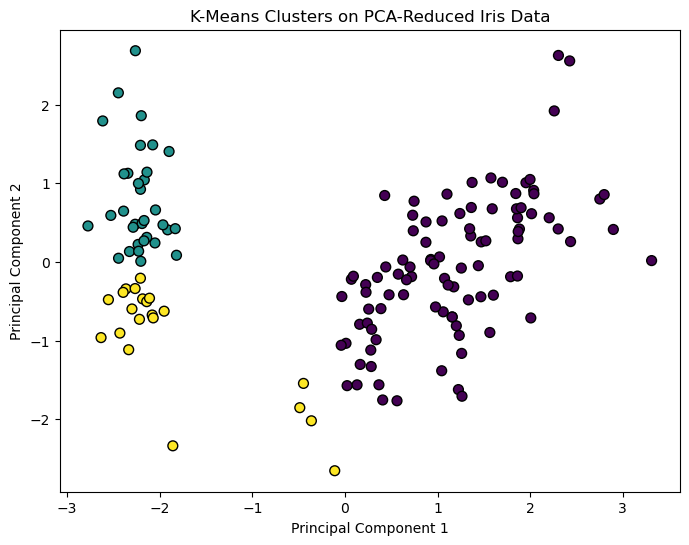

In [16]:
#Scatter Plot Visual without species label differentiation (compare with above)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, edgecolor='k')
plt.title("K-Means Clusters on PCA-Reduced Iris Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Versicolor and Virginica overlap in PCA space, K-Means cannot resolve them perfectly due to bias (preference for spherical clusters as opposed to elongated or spread as shown here)

<Figure size 700x500 with 0 Axes>

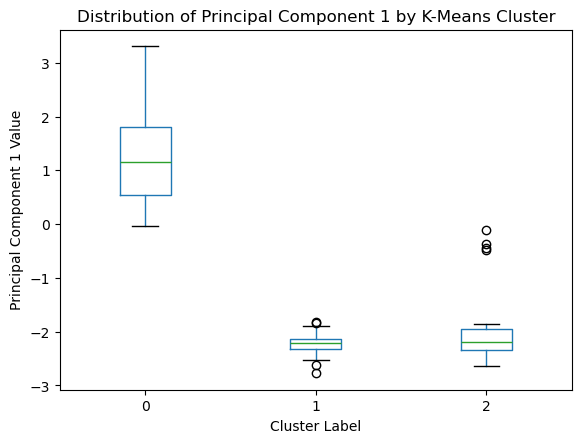

In [17]:
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': kmeans_labels
})

plt.figure(figsize=(7, 5))
df_pca.boxplot(column='PC1', by='Cluster', grid=False)
plt.title("Distribution of Principal Component 1 by K-Means Cluster")
plt.suptitle("")  # Removes default pandas title
plt.xlabel("Cluster Label")
plt.ylabel("Principal Component 1 Value")
plt.show()


Boxplots show some outliers—points that do not fit cleanly in a cluster

**`Stage.3`** - Expected Outcomes
- Combination plot provides guidance on desired outcomes.
- You're not required to generate a combined plot but ensure to visualize outcomes.
- As a refresher, note any curious issues or discriminating factors.
- Indicate scaling issues and/or unaddressed bias.

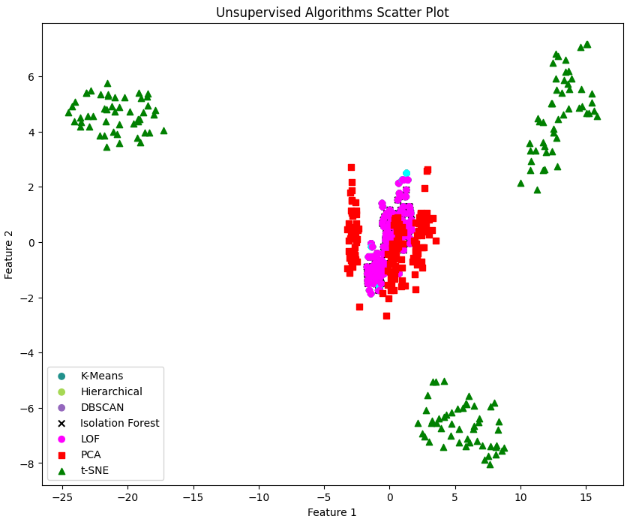

## `Stage.4.Machine.Learning and Evaluation`

**`Tasks`**
1. Perform train_test_split.
2. Fit data to the training set.
3. Generate predicted outcomes.
4. Evaluate performance with cross-validation.
5. Compute the confusion matrix.
6. In place of stage.5 - Visualization
=> Provide a brief 1-2 paragraph of algorithmic performance.

- K-Means
- Hierarchical
- DBSCAN - use ===> `Silhouette Score` <- This is the only evaluation you need to do for your analysis of cluster quality.
- Isolation Forest
- LOF
- PCA
- SVD
- t-SNE

**`Learning Moment`**
- ensure you have addressed labels to serve your solution.
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
```
df.columns
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
 'PetalWidthCm','Species', 'species_label'], dtype='object')
```


In [2]:
# Species-label from previous will suffice in place of label id for species (0/1/2)

In [3]:
# Starting from scratch
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import confusion_matrix, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data
y = iris.target


In [4]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [5]:
# Standardize and conduct PCA, Fit on train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce to 2D for plotting
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [6]:
# K-Means Clustering
# Moved on to task 4, still running into issues idle, this cell consistently ends kernel, stuck here, K Means related 
# Solved

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_pca)

# Predict cluster for train and test
y_train_pred = kmeans.predict(X_train_pca)
y_test_pred = kmeans.predict(X_test_pca)


In [7]:
# Cross Validation
from sklearn.base import clone

def cross_val_kmeans(X, y, n_clusters=3, n_splits=5):
    """Manual cross-validation for unsupervised KMeans."""
    from sklearn.model_selection import StratifiedKFold
    from sklearn.base import clone
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    for train_idx, test_idx in skf.split(X, y):
        model = clone(KMeans(n_clusters=n_clusters, random_state=42))
        model.fit(X[train_idx])
        labels = model.predict(X[test_idx])
        # Silhouette as a rough unsupervised score:
        scores.append(silhouette_score(X[test_idx], labels))
    return np.mean(scores), np.std(scores)


mean_score, std_score = cross_val_kmeans(X_train_pca, y_train)
print(f"K-Means Silhouette Score (cross-val): {mean_score:.3f} ± {std_score:.3f}")



K-Means Silhouette Score (cross-val): 0.522 ± 0.038


In [8]:
from scipy.stats import mode

def best_cluster_labels(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in range(3): # 3 clusters
        mask = (y_pred == i)
        if np.sum(mask) == 0:
            continue
        labels[mask] = mode(y_true[mask], keepdims=False).mode
    return labels

kmeans_labels_mapped = best_cluster_labels(y_train, y_train_pred)
cm = confusion_matrix(y_train, kmeans_labels_mapped)
print("Confusion matrix for K-Means (train):\n", cm)


Confusion matrix for K-Means (train):
 [[35  0  0]
 [ 1  0 34]
 [ 0  0 35]]


In [9]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan.fit(X_train_pca)
dbscan_labels = dbscan.labels_  # -1 means noise

# Silhouette Score (exclude noise points)
mask = dbscan_labels != -1
if np.sum(mask) > 1:
    sil_score = silhouette_score(X_train_pca[mask], dbscan_labels[mask])
    print(f"DBSCAN Silhouette Score (train, excluding noise): {sil_score:.3f}")
else:
    print("Not enough clusters for Silhouette Score.")


DBSCAN Silhouette Score (train, excluding noise): 0.635


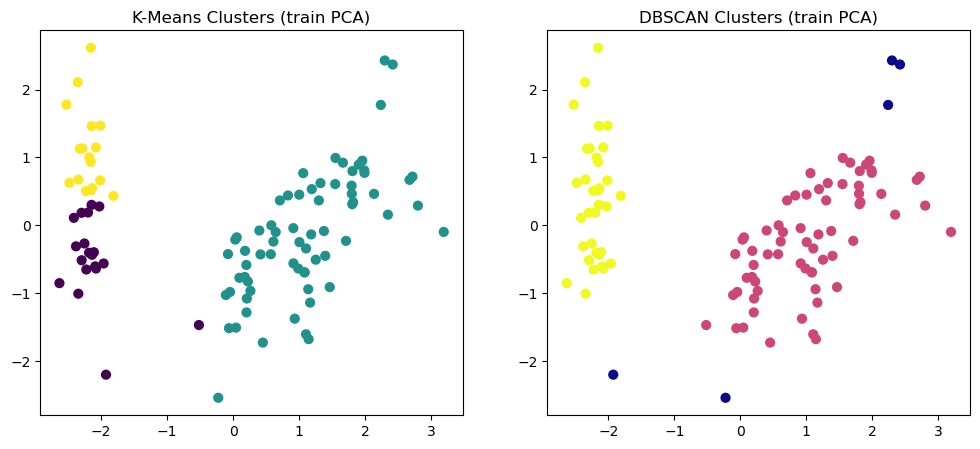

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pred, cmap='viridis', s=40)
axes[0].set_title('K-Means Clusters (train PCA)')
axes[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=dbscan_labels, cmap='plasma', s=40)
axes[1].set_title('DBSCAN Clusters (train PCA)')
plt.show()



#### `Stage.5.Task => Algorithmic Performance

In Stage 4, I chose K-Means and DBSCAN to apply to the PCA-reduced Iris dataset (consistent with task 3) to assess clustering quality and separation. K-Means clustering produced three distinct clusters, with a cross-validated Silhouette Score of 0.522 (±0.038), indicating a moderate level of separation between clusters. The confusion matrix shows that K-Means aligns nearly perfectly with the true Iris classes for the train set, with only a single misclassification, demonstrating that the algorithm effectively partitions the data in line with ground truth labels. This high performance is visually evident in the left plot, where clusters are well-separated.
<br>DBSCAN, on the other hand, yielded a higher Silhouette Score of 0.635 (excluding noise), suggesting even better-defined clusters in the projected space. However, DBSCAN identified a small number of points as noise (outliers, marked by the dark blue in the right plot), and its ability to separate clusters relies heavily on parameter choices. <br>Overall, while both algorithms perform strongly, DBSCAN provided higher cluster quality by Silhouette Score but does not directly map clusters to classes. K-Means provides interpretable, class-like clusters with excellent accuracy and remains a strong choice for well-separated, spherical clusters as in the Iris dataset.


## `Stage.5.Visualization`

As a refresher,
- In lieu of stage.5 - Visualization
=> provide a brief 1-2 paragraph of algorithmic performance in Stage.4.
